This function models a periodic input that captures the dynamic nature of sound quality evaluations. By incorporating this quartic sine wave input into a modified Elman neural network, the code facilitates the learning of complex patterns associated with auditory stimuli. The periodic characteristics of the function are crucial for enhancing the network's predictive accuracy regarding sound quality, reflecting the underlying periodic characteristics of EEG signals related to auditory perception. The implementation leverages a further Mawhin’s continuation theorem to establish conditions for the existence of a periodic output, thereby ensuring the robustness of the model in sound quality prediction.

<ipython-input-1-907f5a8aa8f5>:29: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x_values, y_values, order)


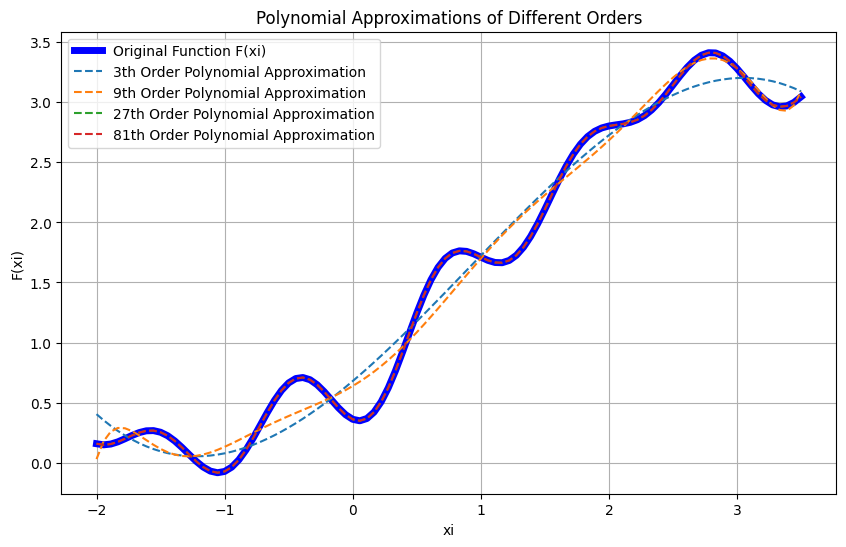

In [1]:
# Import necessary libraries
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Define the variable
xi = sp.symbols('xi')

# Define the function F(xi)
F_xi = 16.98 * sp.sin(0.5262 * xi + 1.622) + \
        16.45 * sp.sin(0.5666 * xi - 1.436) + \
        0.1502 * sp.sin(4.268 * xi - 2.09) + \
        0.2333 * sp.sin(5.809 * xi - 2.35)

# Generate sample points
x_values = np.linspace(-2, 3.5, 100)  # Change the range as needed
y_values = [float(F_xi.subs(xi, x).evalf()) for x in x_values]  # Convert to float

# Define the polynomial orders to compare
orders = [3, 9, 27, 81]#5, 7, 9]5, 7, 9]

# Plot the original function
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='Original Function F(xi)', color='blue',linewidth=5)

# Loop through each order, fit the polynomial, and plot
for order in orders:
    # Fit a polynomial of the current order
    coeffs = np.polyfit(x_values, y_values, order)

    # Create a polynomial function from the coefficients
    poly = np.poly1d(coeffs)

    # Generate values for the polynomial
    y_poly = poly(x_values)

    # Plot the polynomial approximation
    plt.plot(x_values, y_poly, label=f'{order}th Order Polynomial Approximation', linestyle='--')

# Customize the plot
plt.title('Polynomial Approximations of Different Orders')
plt.xlabel('xi')
plt.ylabel('F(xi)')
plt.legend()
plt.grid()
plt.show()